In [1]:
import datetime, time
import numpy as np
import pandas as pd
from scipy import stats
import os
import subprocess

In [2]:

reference = 'IEF'

days = '10days'
#days = '90days'
#days = 'year'

sp = np.genfromtxt(os.path.join('./sims_financials', 'companies_financials.csv'), delimiter=',', dtype=None)


In [3]:
tickers = sp[:,0]
industries = sp[:,1]

samples = tickers.size
states = []
for i in range(0,10):
    states.append(np.zeros(samples))

In [4]:

ticker_sub = tickers[:]
industry_sub = industries[:]

companies_sub = np.vstack((ticker_sub,industry_sub))

In [5]:
companies_sub[0,:]

array(['AMG', 'ALL', 'AXP', 'AIG', 'AMT', 'AMP', 'AON', 'AIV', 'AJG',
       'AIZ', 'AVB', 'BAC', 'BBT', 'BRK-B', 'BLK', 'HRB', 'BXP', 'COF',
       'CBG', 'SCHW', 'CB', 'CINF', 'C', 'CME', 'CMA', 'CCI', 'DLR', 'DFS',
       'EFX', 'EQR', 'ESS', 'EXR', 'FRT', 'FITB', 'BEN', 'GGP', 'GS',
       'HIG', 'HCP', 'HST', 'IVZ', 'JPM', 'KEY', 'KIM', 'LM', 'LUK', 'LNC',
       'L', 'MTB', 'MAC', 'MMC', 'MET', 'MCO', 'MS', 'NDAQ', 'NTRS',
       'PBCT', 'PNC', 'PFG', 'PGR', 'PLD', 'PRU', 'PSA', 'O', 'RF', 'SPGI',
       'SPG', 'SLG', 'STT', 'STI', 'TROW', 'BK', 'TRV', 'TMK', 'USB',
       'UDR', 'UNM', 'VTR', 'VNO', 'WFC', 'HCN', 'WY'], 
      dtype='|S10')

In [6]:
n=0
e=0
error_companies = []
final_companies = []
final_companies_ind = []
pd.options.display.float_format = '{:,.4f}'.format

for t,i in zip(companies_sub[0,:],companies_sub[1,:]):

    if (not (i == 'Financials')):
        continue
        
    try:
        fname = t +"_"+ i + "_" + str(days) + "_kdes_" + str(reference) + "_adv.csv"
        dfrtmp = pd.read_csv(os.path.join('./sims_financials', fname))
        for s in range(0,9):
            states[s][n] = dfrtmp.at[s,'D']
        n=n+1
        final_companies.append(t)
        final_companies_ind.append(i)
    except:
        e = e+1
        print (t,i)
        error_companies.append(t)
    
print (e)
print (n)
#ec = np.array((error_companies))
#fc1 = np.array((final_companies))
#fc2 = np.array((final_companies_ind))
#fc = np.vstack((fc1,fc2))
#fc=fc.T
#print fc
#for i in range(0,10):
#    states[i] = states[i][:n]
#np.savetxt('companies_final.csv',fc,delimiter=',',fmt="%s")

('AIV', 'Financials')
('FITB', 'Financials')
('LM', 'Financials')
('SLG', 'Financials')
('BK', 'Financials')
5
77


In [7]:
for i in range(0,10):
    states[i] = states[i][:n]

In [8]:
dfr = pd.DataFrame({  #"MLS", "Rand","Vtr","Psd","Lls","Mlns
                    '1 state' : states[0],
                    '3 states' : states[2],
                    '5 states' : states[4],
                    '7 states' : states[6],
                    '9 states' : states[8],
                    #'6 states' : states[5], 
                    #'7 states' : states[6],
                    #'8 states' : states[7],
                    #'9 states' : states[8], 
                     })

In [9]:
dfr.tail(9)

,1 state,3 states,5 states,7 states,9 states
68,0.3118,0.1994,0.1894,0.2895,0.2423
69,0.2385,0.2657,0.2794,0.2791,0.2186
70,0.3815,0.3837,0.3641,0.3748,0.3464
71,0.2838,0.3323,0.3407,0.3170,0.2701
72,0.1362,0.1010,0.1722,0.1717,0.2066
73,0.1002,0.1208,0.1508,0.1686,0.1097
74,0.1762,0.2270,0.1830,0.1761,0.1800
75,0.1104,0.0887,0.1202,0.0769,0.1351
76,0.2978,0.2882,0.2635,0.2466,0.2929


In [10]:
dfr.describe()[:3]

,1 state,3 states,5 states,7 states,9 states
count,77.0000,77.0000,77.0000,77.0000,77.0000
mean,0.1701,0.1848,0.1858,0.1885,0.1901
std,0.1032,0.1410,0.1333,0.1366,0.1374


In [11]:
d1 = dfr['1 state']
d2 = dfr['3 states']
d3 = dfr['5 states']
d4 = dfr['7 states']
d5 = dfr['9 states']


In [12]:
dfr_alone = pd.read_csv('stand_alone_10days_dfr_financials.csv')

In [13]:
dfr_alone.describe()

,Unnamed: 0,1 state,3 states,5 states,7 states,9 states
count,82.0000,82.0000,82.0000,82.0000,82.0000,82.0000
mean,40.5000,0.1709,0.1929,0.1992,0.1980,0.2049
std,23.8153,0.1035,0.1352,0.1381,0.1399,0.1450
min,0.0000,0.0130,0.0248,0.0259,0.0230,0.0226
25%,20.2500,0.0965,0.1004,0.1032,0.1049,0.1094
50%,40.5000,0.1480,0.1576,0.1725,0.1635,0.1759
75%,60.7500,0.2188,0.2489,0.2501,0.2626,0.2644
max,81.0000,0.5673,0.6899,0.7120,0.7502,0.6932


In [19]:
d1_alone = dfr_alone['1 state'][:n]
d2_alone = dfr_alone['3 states'][:n]
d3_alone = dfr_alone['5 states'][:n]
d4_alone = dfr_alone['7 states'][:n]
d5_alone = dfr_alone['9 states'][:n]

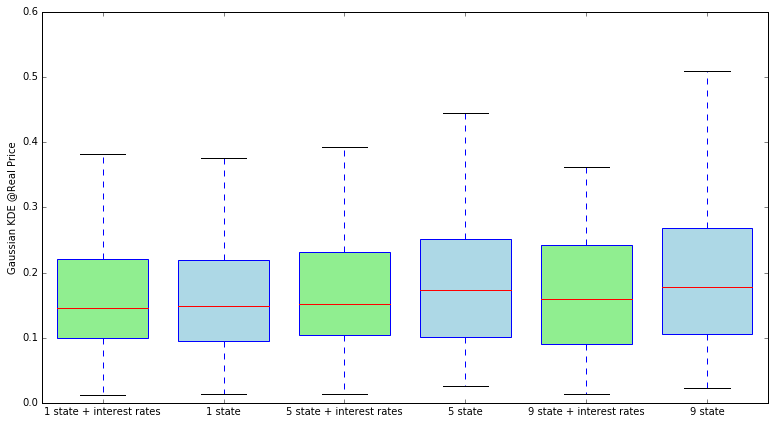

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

%matplotlib inline
plt.figure(figsize=(13, 7))
data = [d1,d1_alone,d3,d3_alone,d5,d5_alone]
box = plt.boxplot(data, 0, '',widths=0.75, patch_artist=True);
plt.xticks([1,2,3,4,5,6], ['1 state + interest rates', '1 state','5 state + interest rates', '5 state',
                         '9 state + interest rates', '9 state']);
plt.ylabel("Gaussian KDE @Real Price")
colors = ['lightgreen', 'lightblue', 'lightgreen', 'lightblue', 'lightgreen', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.savefig('boxplot_financials_interestRates.png', bbox_inches='tight')

In [21]:
#z_stat, p_val = stats.ranksums(d1,d2)

In [22]:
#print (p_val)

In [23]:
p_val1 = stats.wilcoxon(d1,d1_alone, zero_method='wilcox', correction=False)[1]
p_val2 = stats.wilcoxon(d2,d2_alone, zero_method='wilcox', correction=False)[1]
p_val3 = stats.wilcoxon(d3,d3_alone, zero_method='wilcox', correction=False)[1]
p_val4 = stats.wilcoxon(d4,d4_alone, zero_method='wilcox', correction=False)[1]
p_val5 = stats.wilcoxon(d5,d5_alone, zero_method='wilcox', correction=False)[1]


In [24]:
print("P-value 1 ", p_val1) # Used because data is paired ! :D
print("P-value 2 ", p_val2)
print("P-value 3 ", p_val3)
print("P-value 4 ", p_val4)
print("P-value 5 ", p_val5)


('P-value 1 ', 0.92919661263113529)
('P-value 2 ', 0.58169868496381949)
('P-value 3 ', 0.26289215585319714)
('P-value 4 ', 0.39788851996690022)
('P-value 5 ', 0.30625603002793422)


In [ ]:
filename = "States_Table_Comparison_" + days + '_adv.tex'

template = r'''\documentclass[preview]{{standalone}}
\usepackage{{booktabs}}
\begin{{document}}
{}
\end{{document}}
'''

with open(filename, 'wb') as f:
    f.write(template.format(dfr.describe()[:3].to_latex()))

subprocess.call(['pdflatex', filename])

In [ ]:
dfr_pvalues =  pd.DataFrame({       
                    '': pd.Categorical(["1 state vs."]),
                    '5 states':p_val1,
                    '9 states':p_val2,
                    
                     }, index=['p-value'])
#'D':np.array([0] * 2,dtype='int32'),

In [ ]:
dfr_pvalues

In [ ]:
filename = "States_Pvalues_Comparison_" + days + '_adv.tex'

template = r'''\documentclass[preview]{{standalone}}
\usepackage{{booktabs}}
\begin{{document}}
{}
\end{{document}}
'''

with open(filename, 'wb') as f:
    f.write(template.format(dfr_pvalues.to_latex()))

subprocess.call(['pdflatex', filename])